# Student Activity: Beta Comparisons

Upper management at Harold's company is thinking about investing in a social media stock. They want to be somewhat conservative and look at social media stocks with the lowest beta relative to the others. Harold has been asked to calculate and plot the 30-day rolling betas for these social media stocks: Facebook (FB), Twitter (TWTR), and Snapchat (SNAP).

Use the Pandas library to help Harold calculate and plot the 30-day rolling betas for social media stocks, and then determine the social media stock with the lowest beta value.

## Instructions

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path

%matplotlib inline

### Read CSVs in as DataFrames

In [2]:
# Read the daily closing prices of FB, set the `date` as a datetime index
fb_data = Path("../Resources/fb_data.csv")
fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of TWTR, set the `date` as a datetime index
twtr_data = Path("../Resources/twtr_data.csv")
twtr_df = pd.read_csv(twtr_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of SNAP, set the `date` as a datetime index
snap_data = Path("../Resources/snap_data.csv")
snap_df = pd.read_csv(snap_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("../Resources/sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)

### Combine DataFrames, Sort Index, and Rename Columns

In [3]:
# Create a new DataFrame where the columns are the closing prices for each ticker
combined_df = pd.concat([fb_df, twtr_df, snap_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df = combined_df.sort_index()

# Set column names to 'FB' 'TWTR', 'SNAP', and 'S&P 500'
combined_df.columns = ["FB", "TWTR", "SNAP", "S&P 500"]

# Display a few rows
combined_df.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2017-03-02,136.76,15.79,24.48,2381.919922
2017-03-03,137.17,15.75,27.09,2383.120117
2017-03-06,137.42,15.56,23.77,2375.310059
2017-03-07,137.30,15.18,21.44,2368.389893
2017-03-08,137.72,15.24,22.81,2362.979980


### Calculate Daily Returns

In [4]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2017-03-02,NaN,NaN,NaN,NaN
2017-03-03,0.002998,-0.002533,0.106618,0.000504
2017-03-06,0.001823,-0.012063,-0.122554,-0.003277
2017-03-07,-0.000873,-0.024422,-0.098023,-0.002913
2017-03-08,0.003059,0.003953,0.063899,-0.002284


### Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns

In [5]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
fb_covariance = daily_returns["FB"].cov(daily_returns["S&P 500"])
twtr_covariance = daily_returns["TWTR"].cov(daily_returns["S&P 500"])
snap_covariance = daily_returns["SNAP"].cov(daily_returns["S&P 500"])

# Display the covariance of each social media stock
print(f"Facebook covariance: {fb_covariance}")
print(f"Twitter covariance: {twtr_covariance}")
print(f"Snapchat covariance: {snap_covariance}")

Facebook covariance: 8.971694582778613e-05
Twitter covariance: 0.00010569463221453374
Snapchat covariance: 7.769087430496199e-05


### Calculate Variance of S&P 500 Returns

In [6]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
variance = daily_returns["S&P 500"].var()

# Diplay S&P 500 variance
print(f"S&P 500 variance: {variance}")

S&P 500 variance: 7.000796173303153e-05


### Calculate Beta Values of Social Media Stocks

In [7]:
# Calculate beta of all daily returns of social media stocks
fb_beta = fb_covariance / variance
twtr_beta = twtr_covariance / variance
snap_beta = snap_covariance / variance

# Display the beta value of each social media stock
print(f"FB: {fb_beta} | TWTR: {twtr_beta} | SNAP: {snap_beta}")

FB: 1.2815248952670966 | TWTR: 1.509751599647906 | SNAP: 1.1097434117740563


### Calculate 30-Day Rolling Betas of Social Media Stock Returns vs. S&P 500 Returns

In [8]:
# Calculate 30-day rolling covariance of social media stocks vs. S&P 500 and plot the data
rolling_fb_covariance = daily_returns["FB"].rolling(window=30).cov(daily_returns["S&P 500"])
rolling_twtr_covariance = daily_returns["TWTR"].rolling(window=30).cov(daily_returns["S&P 500"])
rolling_snap_covariance = daily_returns["SNAP"].rolling(window=30).cov(daily_returns["S&P 500"])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = daily_returns["S&P 500"].rolling(window=30).var()

# Calculate 30-day rolling beta of social media stocks and plot the data
rolling_fb_beta = rolling_fb_covariance / rolling_variance
rolling_twtr_beta = rolling_twtr_covariance / rolling_variance
rolling_snap_beta = rolling_snap_covariance / rolling_variance

### Plot Rolling 30-Day Betas of Social Media Stocks

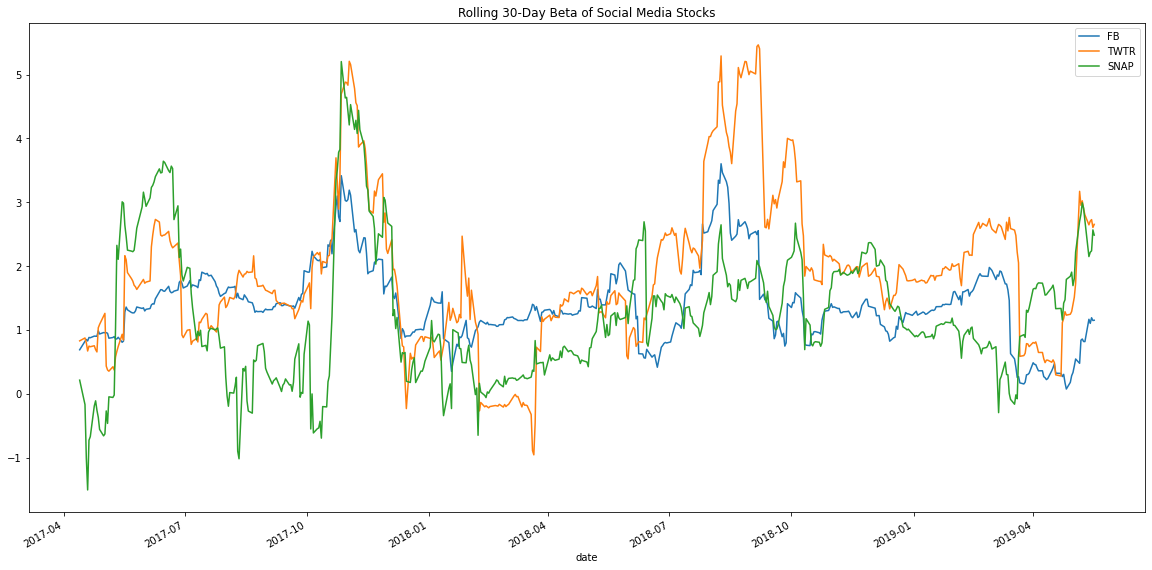

In [9]:
# Set the figure and plot the different social media beta values as multiple trends on the same figure
ax = rolling_fb_beta.plot(figsize=(20, 10), title="Rolling 30-Day Beta of Social Media Stocks")
rolling_twtr_beta.plot(ax=ax)
rolling_snap_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["FB", "TWTR", "SNAP"])